In [83]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from tensorflow.keras.utils import plot_model

In [89]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [90]:
!pip install kagglehub --quiet

import kagglehub
import pandas as pd
import os
import glob

# Download latest version of the dataset, path is the folder containing files
path = kagglehub.dataset_download("ahmedesammohammed/testselection")

print("Path to dataset files:", path)

# Find all CSV files in the downloaded folder
csv_files = glob.glob(os.path.join(path, "*.csv"))

print(f"Found CSV files: {csv_files}")

dfs = []
for file_path in csv_files:
    df = pd.read_csv(file_path, header=None)
    dfs.append(df)

df = pd.concat(dfs, axis=0, ignore_index=True)
df


Path to dataset files: /kaggle/input/testselection
Found CSV files: ['/kaggle/input/testselection/UNSW_NB15_testing-set.csv']


/tmp/ipython-input-2546050484.py:20: DtypeWarning: Columns (0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
1,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
2,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
3,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
4,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,82328,0.000005,udp,-,INT,2,0,104,0,200000.0051,...,1,2,0,0,0,2,1,0,Normal,0
82329,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82330,82330,0.0,arp,-,INT,1,0,46,0,0.0,...,1,1,0,0,0,1,1,1,Normal,0
82331,82331,0.0,arp,-,INT,1,0,46,0,0.0,...,1,1,0,0,0,1,1,1,Normal,0


In [91]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='int64')

In [92]:
# Use the second row as the header
df.columns = df.iloc[0]
# Drop the original header row
df = df[1:]
# Rename the 'label' column to 'Label'
df = df.rename(columns={'label': 'Label'})
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,Label
1,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
2,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
3,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
4,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
5,5,0.00001,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,82328,0.000005,udp,-,INT,2,0,104,0,200000.0051,...,1,2,0,0,0,2,1,0,Normal,0
82329,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82330,82330,0.0,arp,-,INT,1,0,46,0,0.0,...,1,1,0,0,0,1,1,1,Normal,0
82331,82331,0.0,arp,-,INT,1,0,46,0,0.0,...,1,1,0,0,0,1,1,1,Normal,0


In [93]:
df.isnull().sum()

,0
0,
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0


### Data Cleaning

In [94]:
df['Label'].value_counts()

,count
Label,
0,36757
1,29192
1,16140
0,243


In [95]:
df['attack_cat'].isnull().sum()

np.int64(0)

In [96]:
df['attack_cat'] = df['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())

In [97]:
df['attack_cat'].value_counts()

,count
attack_cat,
normal,37000
generic,18871
exploits,11132
fuzzers,6062
dos,4089
reconnaissance,3496
analysis,677
backdoor,583
shellcode,378


In [100]:
df['attack_cat'] = df['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [99]:
df['attack_cat'].value_counts()

,count
attack_cat,
normal,37000
generic,18871
exploits,11132
fuzzers,6062
dos,4089
reconnaissance,3496
analysis,677
backdoor,583
shellcode,378


In [101]:
df.isnull().sum()

,0
0,
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0


In [102]:
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(value=0)
df['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,65534
0,16120
1,415
1,259
2,4


In [103]:
df['is_ftp_login'] = df['is_ftp_login'].fillna(value=0)
df['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,65534
0,16120
1,415
1,259
2,4


In [105]:
df['is_ftp_login'] = pd.to_numeric(df['is_ftp_login'], errors='coerce')
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])
df['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,81654
1,678


In [106]:
df.isnull().sum()

,0
0,
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0


In [107]:
df['service'].value_counts()

,count
service,
-,47153
dns,21367
http,8287
smtp,1851
ftp,1552
ftp-data,1396
pop3,423
ssh,204
ssl,30


In [108]:
df['service'] = df['service'].apply(lambda x:"None" if x=='-' else x)
df['service'].value_counts()

,count
service,
None,47153
dns,21367
http,8287
smtp,1851
ftp,1552
ftp-data,1396
pop3,423
ssh,204
ssl,30


In [109]:
df['ct_ftp_cmd'].unique()

array(['0', '1', '2', 0, 1, 2], dtype=object)

In [110]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)
df['ct_ftp_cmd'].unique()

array([0, 1, 2])

In [111]:
df[['service','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','attack_cat','Label']]

,service,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,attack_cat,Label
1,None,0,0,0,normal,0
2,None,0,0,0,normal,0
3,None,0,0,0,normal,0
4,None,0,0,0,normal,0
5,None,0,0,0,normal,0
...,...,...,...,...,...,...
82328,None,0,0,0,normal,0
82329,None,0,0,0,normal,0
82330,None,0,0,0,normal,0
82331,None,0,0,0,normal,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 1 to 82332
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 82332 non-null  object
 1   dur                82332 non-null  object
 2   proto              82332 non-null  object
 3   service            82332 non-null  object
 4   state              82332 non-null  object
 5   spkts              82332 non-null  object
 6   dpkts              82332 non-null  object
 7   sbytes             82332 non-null  object
 8   dbytes             82332 non-null  object
 9   rate               82332 non-null  object
 10  sttl               82332 non-null  object
 11  dttl               82332 non-null  object
 12  sload              82332 non-null  object
 13  dload              82332 non-null  object
 14  sloss              82332 non-null  object
 15  dloss              82332 non-null  object
 16  sinpkt             82332 non-null  objec

In [113]:
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

In [114]:
data_cleaning(df)

Dataset Shape:  (82332, 45)
Zero Variance Columns:  []  are dropped!!
Shape after removing the zero variance columns:  (82332, 45)


In [115]:
df.drop(columns=['id','Label'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 1 to 82332
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   dur                82332 non-null  object
 1   proto              82332 non-null  object
 2   service            82332 non-null  object
 3   state              82332 non-null  object
 4   spkts              82332 non-null  object
 5   dpkts              82332 non-null  object
 6   sbytes             82332 non-null  object
 7   dbytes             82332 non-null  object
 8   rate               82332 non-null  object
 9   sttl               82332 non-null  object
 10  dttl               82332 non-null  object
 11  sload              82332 non-null  object
 12  dload              82332 non-null  object
 13  sloss              82332 non-null  object
 14  dloss              82332 non-null  object
 15  sinpkt             82332 non-null  object
 16  dinpkt             82332 non-null  objec

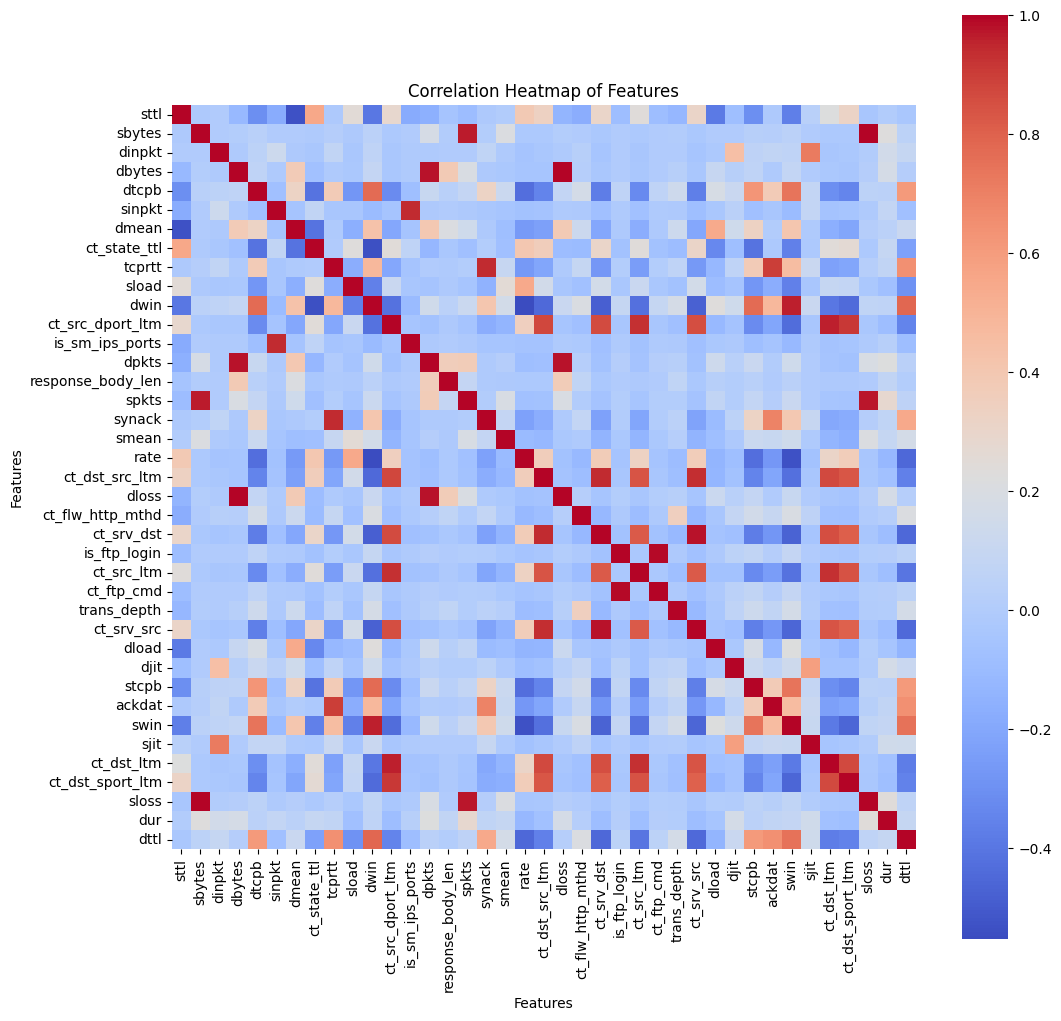

In [116]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(df.columns) - set(cat_col) - set(['attack_cat']))

# Convert numerical columns to numeric type, coercing errors
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns that couldn't be converted to numeric (if any)
df.dropna(axis=1, inplace=True)

correlation_matrix = df[num_col].corr()


plt.figure(figsize=(12, 12))


sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Features')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

### Data Normalization

In [117]:
std_scaler = MinMaxScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = df.select_dtypes(include='number').columns
df = standardization(df,numeric_col)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 1 to 82332
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [119]:
# label encoding (0,1,2,3,4,5,6,7,8,9) multi-class labels (analysis,backdoor,dos,exploits,fuzzers,generic,normal,reconnaissance,shellcode,worms)
attack = pd.DataFrame(df.attack_cat)

le2 = preprocessing.LabelEncoder()
enc_label = attack.apply(le2.fit_transform)
df['intrusion'] = enc_label
print(df.shape)
df
df.info()

(82332, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt    

In [120]:
df.drop(columns=['attack_cat'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 1 to 82332
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [121]:
# OneHotEncoding on categorical features

df = pd.get_dummies(df,columns=cat_col,prefix="",prefix_sep="")
print(df.shape)

(82332, 191)


### Train-Test Split

In [122]:
y= df['intrusion']
X= df.drop(labels=['intrusion'], axis=1)

In [123]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(65865, 190) 
 (16467, 190)


In [125]:
#selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(6586, 190) (6586,)
(1647, 190) (1647,)


In [126]:
#from sklearn.preprocessing import LabelBinarizer
#y_train = LabelBinarizer().fit_transform(y_train)
#y_test =  LabelBinarizer().fit_transform(y_test)

In [127]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'tcp',
       'udp', 'unas', 'None', 'dns', 'INT'],
      dtype='object')
38
[3.43358067e-02 1.21749502e-02 2.47909284e-02 7.58330003e-02
 2.72037940e-02 4.15167925e-02 2.32702939e-02 1.55895345e-02
 3.81860633e-02 2.45250577e-02 7.76667904e-03 1.00425452e-02
 2.39155647e-02 2.10547458e-02 1.77544614e-02 1.35536515e-02
 6.51841963e-03 8.22554193e-03 1.04152083e-02 1.31388602e-03
 1.73589300e-02 1.99289800e-02 1.65872842e-02 5.25411097e-02
 2.53022420e-02 2.17419814e-03 3.19378143e-03 3.71283691e-02
 1.81854334e-02 1.97538314e-02 2.71136288e-02 3.36069414e-02
 4.25909219e-02 1.61869904e-04 7.84662818e-05 2.2819599

In [128]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

In [129]:
from sklearn.preprocessing import LabelBinarizer
y_train = LabelBinarizer().fit_transform(y_train)
y_test =  LabelBinarizer().fit_transform(y_test)

In [130]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train_rfc, ( X_train_rfc.shape[0], 1 , X_train_rfc.shape[1] ))
X_test = np.reshape(X_test_rfc, ( X_test_rfc.shape[0], 1,  X_test_rfc.shape[1] ))

In [131]:
model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train_rfc.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
# summary of model layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 64)          │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,176 (375.69 KB)

 Trainable params: 96,176 (375.69 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=5000,
        validation_split=0.2,
        verbose=1
    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 485ms/step - accuracy: 0.0994 - loss: 2.3031 - val_accuracy: 0.4294 - val_loss: 2.2917
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4472 - loss: 2.2913 - val_accuracy: 0.4294 - val_loss: 2.2798
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4460 - loss: 2.2790 - val_accuracy: 0.4294 - val_loss: 2.2668
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4459 - loss: 2.2658 - val_accuracy: 0.4294 - val_loss: 2.2524
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4464 - loss: 2.2508 - val_accuracy: 0.4294 - val_loss: 2.2361
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4455 - loss: 2.2342 - val_accuracy: 0.4294 - val_loss: 2.2176
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4452 - loss: 2.2151 - val_accuracy: 0.4294 - val_loss: 2.1962
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4463 - loss: 2.1929 - val_accuracy: 0.4294 - val_los

In [135]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-1926484947.py", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 489, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 93, in test_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 690, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 699, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2181, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1915, in categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 679, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,10] labels_size=[32,9]
	 [[{{node compile_loss/categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_multi_step_on_iterator_23989]